# Retrieve MODIS/VIIRS tile numbers from GeoJSON
This tutorial shows how to retrieve MODIS/VIIRS tiles in Sinusoidal (SIN) grid.

In [1]:
## Import modules
import math
import numpy as np
import geopandas as gpd
import contextily as ctx
from matplotlib import pyplot as plt

We will retrieve the MODIS tiles for Ghana (`data/ghana.json`).

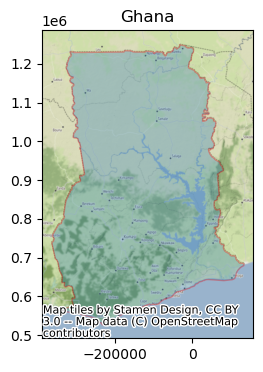

In [2]:
# read and plot ACA GeoJSON file
ghana = gpd.read_file("data/ghana.json") 
ax=ghana.to_crs(epsg=3857).plot(figsize=(3, 4), edgecolor="red", alpha=0.3)
ctx.add_basemap(ax)
ax.set_title("Ghana")
plt.show()

MODIS tiles are ~ 10 x 10 degrees at the equator, and are indicated by horizontal (`h`) and vertical (`v`) tile numbers. Let's first define a function that returns tile numbers (`h`, `v`).

In [3]:
# returns vert tile, horiz tile
def tile_h_v(laty:float, lonx: float, res: int):
    dim = math.ceil(4800*250/res)
    y = ((90 - laty)/180 * 18 * dim - 0.5) 
    x = (lonx/360*36*dim * math.cos(laty * np.pi / 180) + 18*dim - .5) % (36*dim)
    t_h = math.floor(x/dim)
    t_v = math.floor(y/dim)
    t_s = math.ceil(x%dim)
    t_l = math.ceil(y%dim)
    if ((t_l-dim)==0):
        t_l=0
        t_v=t_v+1
    if ((t_s-dim)==0):
        t_s=0
        t_h=t_h+1
    return (t_v, t_h)

Now, using the bounding corner coordinates of the GeoJSON above, let's retrieve `h`,`v` of the modis tiles overlapping the GeoJSON file (Ghana). We will assume the product is `MOD13Q1` with 250m grid resolution.

In [4]:
minx, miny, maxx, maxy = ghana.total_bounds # geojson bounds
grid = 250 # MOD13Q1

v1, h1 = tile_h_v(miny, minx, grid)
v2, h2 = tile_h_v(maxy, maxx, grid) 
v = sorted([v1, v2])
h = sorted([h1, h2])

hv = []
for m in range(v[0], v[1]+1):
    for n in range(h[0], h[1]+1):
        hv.append(f"h{n:02}v{m:02}")
# printing hv numbber
print(hv)

['h17v07', 'h18v07', 'h17v08', 'h18v08']


Now, the `hv` list contains all the MODIS hv grids. 

Let's plot these to make sure we are getting correct tiles. First, open the `modis_singrid.json` GeoJSON file and plot the above `hv` numbers.

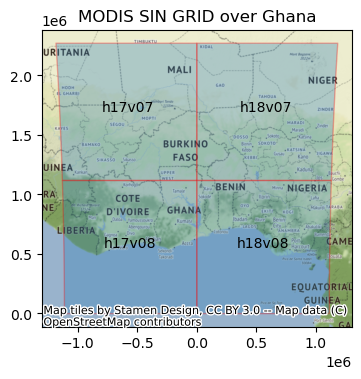

In [5]:
# read MODIS grid
modis = gpd.read_file("data/modis_singrid.json") 
modis_hv = modis[modis['hv'].isin(hv)].to_crs(epsg=3857)
ax=modis_hv.plot(figsize=(4, 5), edgecolor="red", alpha=0.3)
modis_hv.apply(lambda x: ax.annotate(text=x['hv'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1);
ctx.add_basemap(ax)
ax.set_title("MODIS SIN GRID over Ghana")
plt.show()